# Dataframe module new functionalities

In [1]:
# DYNAMIC PATH SELECTION TO IMPORT THE MODULES
import sys
import os
from pathlib import Path

notebook_path = Path(os.path.abspath('')).resolve()

# Construct the paths to the required directories
modules_path = os.path.join(notebook_path, '..')
df_path = os.path.join(modules_path, 'DataFrame')

# Add the directories to the Python path if they're not already there
if modules_path not in sys.path:
    sys.path.append(modules_path)
if df_path not in sys.path:
    sys.path.append(df_path)

In [2]:
from python_modules.DataFrame import DFModule as df
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Alternative constructor and conversion w.r.t Pandas

We already had it in C++, but we added an alternative constructor by using *@classmethod*

**Default python constructor**

In [3]:
d= df.Dataframe()
d.import_csv("../datasets/housing.csv")
print(d)

Data imported successfully!

<Dataframe with 20640 rows and 10 columns>


**Alternative constructors**

(1) Create a Dataframe directly importing the csv

In [4]:
d= df.Dataframe.from_csv("../datasets/housing.csv")
print(d)

Data imported successfully!

<Dataframe with 20640 rows and 10 columns>


(2) Create a Dataframe by converting an existing pandas df

In [5]:
d_pd= pd.read_csv("../datasets/housing.csv")
print(f'd_pd type: {type(d_pd)}')
d_from_pd= df.Dataframe.from_pandas(d_pd)
print(f'd_from_pd: {d_from_pd}')
print(f'd_from_pd type: {type(d_from_pd)}')

d_pd type: <class 'pandas.core.frame.DataFrame'>
d_from_pd: <Dataframe with 20640 rows and 10 columns>
d_from_pd type: <class 'dataframe.Dataframe'>


Now re-convert *d_from_pd* into a pandas dataframe

In [6]:
d_from_pd=d_from_pd.to_pandas() #need to re-assign, otherwise it will not be converted definitely
type(d_from_pd)

pandas.core.frame.DataFrame

It is interesting that we can use method *to_pandas()* to use pandas function on our class object (without converting them definitely)

In [7]:
d.to_pandas().groupby("ocean_proximity").agg({"median_income": ['mean','std']})

median_income          
                         mean       std
ocean_proximity                        
<1H OCEAN            4.230682  2.001223
INLAND               3.208996  1.437465
ISLAND               2.744420  0.444180
NEAR BAY             4.172885  2.017427
NEAR OCEAN           4.005785  2.010558

In [8]:
print(f'd type: {type(d)}') #d was not converted ;)

d type: <class 'dataframe.Dataframe'>


## Dealing with Nan

Let's import again our dataframe and see how many Nan for each column!

In [9]:
d= df.Dataframe.from_csv("../datasets/housing.csv")
for col in d.colnames():
    print(col, d.countNaN(col))

Data imported successfully!

households 0
housing_median_age 0
latitude 0
longitude 0
median_house_value 0
median_income 0
ocean_proximity 0
population 0
total_bedrooms 207
total_rooms 0


Our cpp class provided only a dropNan() method, that dropped all the rows containing at least one Nan

In [10]:
d.dropNaN()
print(d)

<Dataframe with 20433 rows and 10 columns>


Now we added a method to fill Nan in a selected column with a desired value

In [11]:
d= df.Dataframe.from_csv("../datasets/housing.csv")
print(d)
# Calling fillna with default value inplace=False   
d.fillNaN("total_bedrooms", d.computeMean("total_bedrooms"))
for col in d.colnames():
    print(col, d.countNaN(col))
print('\nNotice that since we used inplace=False, the original dataframe is not modified')

Data imported successfully!

<Dataframe with 20640 rows and 10 columns>
households 0
housing_median_age 0
latitude 0
longitude 0
median_house_value 0
median_income 0
ocean_proximity 0
population 0
total_bedrooms 207
total_rooms 0

Notice that since we used inplace=False, the original dataframe is not modified


In [12]:
d.fillNaN("total_bedrooms", d.computeMean("total_bedrooms"),inplace=True)
for col in d.colnames():
    print(col, d.countNaN(col))

households 0
housing_median_age 0
latitude 0
longitude 0
median_house_value 0
median_income 0
ocean_proximity 0
population 0
total_bedrooms 0
total_rooms 0


## Access to Dataframe in a new user-friendly way

Comparison to **get a column**

In [13]:
d.getColumn("median_house_value") == d["median_house_value"]   

True

Comparison to **get a row**

In [14]:
d.getRowByIdx(1)==d[1]

True

To get a **specific value** by index and attribute? E.g, [0,"households"]

In [15]:
# Cpp version
print(d.getColumn("households")[0])
# Python version
print(d[1,'households'])

126.0
126.0


## Updata Dataframe values in a user-friendly way

(1) **UPDATE** a dataframe entry in a simple way

In [16]:
d= df.Dataframe.from_csv("../datasets/housing.csv")

Data imported successfully!



In [17]:
print('Original Row 1:',d[1])
# Now update the value for households
d[1,'households']=255.13
d[1,'ocean_proximity']="SUPER NEAR BAY"
# Check the value has been updated
print('Updated Row 1 :',d[1])

# Now reset them to the original ones
d[1,'households']=126
d[1,'ocean_proximity']="NEAR BAY"

Original Row 1: [126.0, 41.0, 37.88, -122.23, 452600.0, 8.3252, 'NEAR BAY', 322.0, 129.0, 880.0]
Updated Row 1 : [255.13, 41.0, 37.88, -122.23, 452600.0, 8.3252, 'SUPER NEAR BAY', 322.0, 129.0, 880.0]


(2) **UPDATE** a dataframe column

In [18]:
original_col=d['ocean_proximity']
# print just first 5 entries as an example
print(d[[1,2,3,4,5],'ocean_proximity'])
d['ocean_proximity']=[entry.lower() for entry in d['ocean_proximity']]
print(d[[1,2,3,4,5],'ocean_proximity'])

['NEAR BAY', 'NEAR BAY', 'NEAR BAY', 'NEAR BAY', 'NEAR BAY']
['near bay', 'near bay', 'near bay', 'near bay', 'near bay']


(3) **UPDATE** an entire row (eg: make row2= row1)

Look at the df before updating:

In [19]:
print(d)
d.head(2)

<Dataframe with 20640 rows and 10 columns>
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
households           housing_median_age   latitude             longitude            median_house_value   median_income        ocean_proximity      population           total_bedrooms       total_rooms          
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
126.000000           41.000000            37.880000            -122.230000          452600.000000        8.325200             near bay             322.000000           129.000000           880.000000           
1138.000000          21.000000            37.860000            -122.220000          358500.000000        8.301400

In [20]:
d[2]=d[1]
d.head(2)
print(d) #see that row has changed and df's dimensions stayed the same 

<Dataframe with 20640 rows and 10 columns>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
households           housing_median_age   latitude             longitude            median_house_value   median_income        ocean_proximity      population           total_bedrooms       total_rooms          
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
126.000000           41.000000            37.880000            -122.230000          452600.000000        8.325200             near bay             322.000000           129.000000           880.000000           
126.000000           41.000000            37.880000            -122.230000          452600.000000        8.325200 

## Plotting functionalities

Data imported successfully!



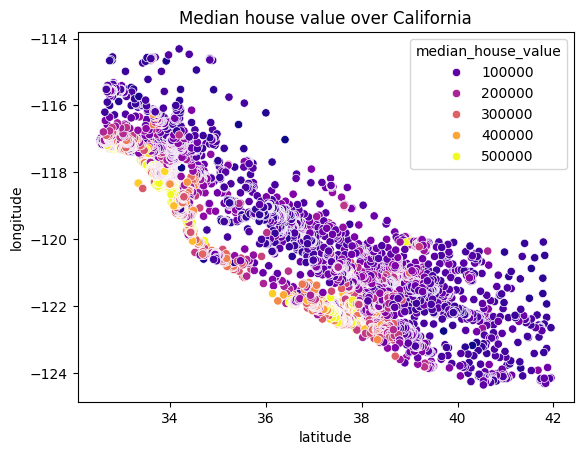

In [21]:
d= df.Dataframe.from_csv("../datasets/housing.csv")
d.scatterplot("latitude","longitude",group_by="median_house_value",
              xlabel="latitude",ylabel="longitude",
              title="Median house value over California",
              palette="plasma")

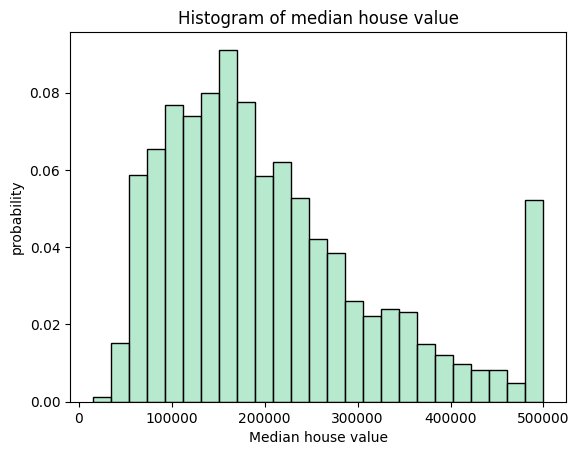

In [22]:
d.hist("median_house_value", stat='probability', bins=25, color="#9FE2BF",
       title="Histogram of median house value", xlabel="Median house value")

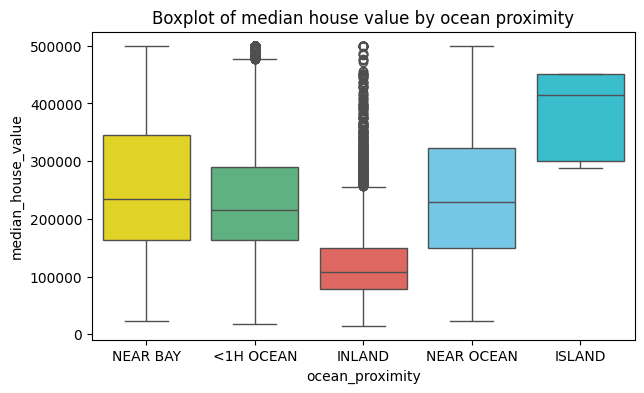

In [23]:
#set figure size
plt.figure(figsize=(7,4))
custom_colors = ["#FFEC08", "#52BE80", "#F3564C", "#62CFFA", "#22D0E5"]
d.boxplot(x="ocean_proximity",y="median_house_value", hue="ocean_proximity", palette=custom_colors,
          title="Boxplot of median house value by ocean proximity")

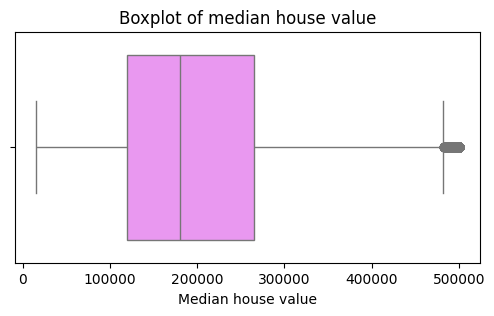

In [24]:
# or horizontally
plt.figure(figsize=(6,3))
d.boxplot(x="median_house_value",color="#F689FF",
          xlabel='Median house value',title="Boxplot of median house value")

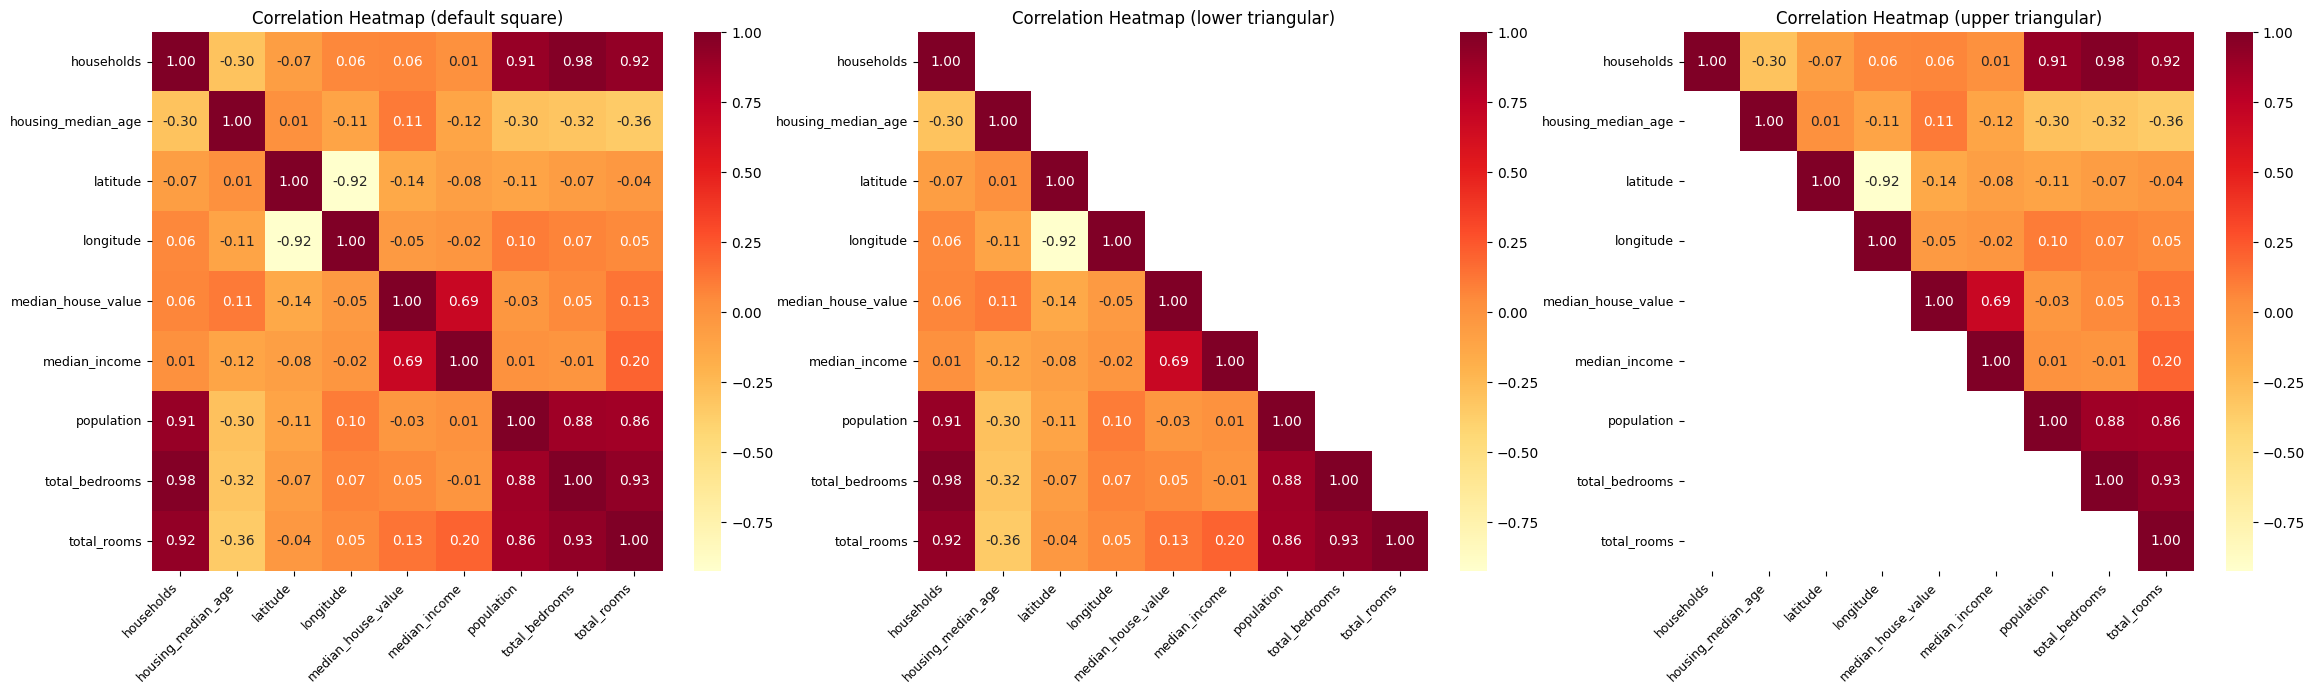

In [25]:
d.dropNaN() # necessary to compute correlation for the heatmap 
num_attributes = [attr for attr in d.colnames() if attr != "ocean_proximity"]
#subplot 1x3 to compare the plot according to the triangular parameter
plt.figure(figsize=(28,7))
plt.subplot(1,3,1)
d.heatmap(attributes=num_attributes, title="Correlation Heatmap (default square)", cmap="YlOrRd")
plt.subplot(1,3,2)
d.heatmap(attributes=num_attributes, title="Correlation Heatmap (lower triangular)", cmap="YlOrRd",triangular="lower")
plt.subplot(1,3,3)
d.heatmap(attributes=num_attributes, title="Correlation Heatmap (upper triangular)", cmap="YlOrRd",triangular="upper")

## CovMat and CorrMat as NumPy matrices

C++ version of the class is just limited to print both correlation and covariance matrices

In [26]:
d.printCorrMat(attributes=num_attributes)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                    households          housing_median_age  latitude            longitude           median_house_value  median_income       population          total_bedrooms      total_rooms         
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
households          1.000               
housing_median_age  -0.303              1.000               
latitude            -0.072              0.012               1.000               
longitude           0.057               -0.109              -0.925              1.000               
median_house_value  0.065               0.106               -0.145              -0.045              1.000        

BUT thanks to the new python functionalities...🥁🥁🥁...now we can get them as np.ndarray 😄🎉

In [27]:
print(type(d.covMatrix(attributes=num_attributes)))
print(type(d.covMatrix(attributes=num_attributes)))
print("\nCorrelation matrix (NumpPy version):\n",d.corrMatrix(attributes=num_attributes))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>

Correlation matrix (NumpPy version):
 [[ 1.         -0.30276797 -0.07177419  0.05651277  0.06489355  0.01343389
   0.9071859   0.97972827  0.91899153]
 [-0.30276797  1.          0.01189907 -0.10935655  0.10643205 -0.11827772
  -0.2957873  -0.32045104 -0.3606283 ]
 [-0.07177419  0.01189907  1.         -0.92461611 -0.14463821 -0.07962632
  -0.10899734 -0.06698283 -0.03666681]
 [ 0.05651277 -0.10935655 -0.92461611  1.         -0.04539822 -0.01555015
   0.1002703   0.06960802  0.04548017]
 [ 0.06489355  0.10643205 -0.14463821 -0.04539822  1.          0.68835548
  -0.02529973  0.04968618  0.13329413]
 [ 0.01343389 -0.11827772 -0.07962632 -0.01555015  0.68835548  1.
   0.00508662 -0.00772285  0.19788152]
 [ 0.9071859  -0.2957873  -0.10899734  0.1002703  -0.02529973  0.00508662
   1.          0.87774674  0.85728125]
 [ 0.97972827 -0.32045104 -0.06698283  0.06960802  0.04968618 -0.00772285
   0.87774674  1.          0.9303795 ]
 [ 0.91899153 -0.

## Feature scaling

**Min-Max scaling**

In [28]:
d= df.Dataframe.from_csv("../datasets/housing.csv")
print(d["median_house_value"][0:10])
d.scale("median_house_value",method="min-max")
print(["{0:0.2f}".format(i) for i in d["median_house_value"][0:10]])

Data imported successfully!

[452600.0, 358500.0, 352100.0, 341300.0, 342200.0, 269700.0, 299200.0, 241400.0, 226700.0, 261100.0]
['0.90', '0.71', '0.70', '0.67', '0.67', '0.53', '0.59', '0.47', '0.44', '0.51']


**Standard scaling**

In [29]:
d= df.Dataframe.from_csv("../datasets/housing.csv")
print(d["median_house_value"][0:10])
d.scale("median_house_value",method="standard")
print(["{0:0.2f}".format(i) for i in d["median_house_value"][0:10]])

Data imported successfully!

[452600.0, 358500.0, 352100.0, 341300.0, 342200.0, 269700.0, 299200.0, 241400.0, 226700.0, 261100.0]
['2.13', '1.31', '1.26', '1.17', '1.17', '0.54', '0.80', '0.30', '0.17', '0.47']


## Try of custom `help()` bindings

Just a quick display of the docstrings implemented in the bindings

In [30]:
help(d.scale)
help(d.computeMean)

Help on method scale in module python_modules.DataFrame.DFModule:

scale(attribute, method='standard') method of dataframe.Dataframe instance
    Scale the values of an attribute to have zero mean and unit standard deviation.

    Parameters:
        - attribute: str, name of the attribute to scale
        - method: str, type of scaling to perform (standard, min-max)

Help on method computeMean in module dataframe:

computeMean(...) method of dataframe.Dataframe instance
    computeMean(self: dataframe.Dataframe, attribute: str) -> float

    Compute the mean of the values in a column of the Dataframe

                Parameters:
                    attribute (string): Name of the column to compute the mean

                Returns:
                    float: Mean of the values in the column

